# **#SUPERSTORE SALES PREDICTION**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_csv('/content/train.csv')

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9800   │ │ string      │ 15    │                                                          │
│ │ Number of columns │ 18     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Row ID          │   0 │      0 │    4900 │    2800 │      1 │    2500 │   4900 │   7400 │   9800 │ ▇▇▇▇▇▇  │  │
│ │ Postal Code     │  11 │   0.11 │   55000 │   32000 │   1000 │   23000 │  58000 │  90000 │  99000 │ ▅▅▃▂▃▇  │  │
│ │ Sales           │   0 │      0 │     230 │     630 │   0.44 │      17 │     54 │    210 │  23000 │    ▇    │  │
│ └─────────────────┴─────┴────────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Order ID                     │      0 │          0 │                           1 │                    9800 │  │
│ │ Order Date                   │      0 │          0 │                           1 │                    9800 │  │
│ │ Ship Date                    │      0 │          0 │                           1 │                    9800 │  │
│ │ Ship Mode                    │      0 │          0 │                           2 │                   19600 │  │
│ │ Customer ID                  │      0 │          0 │                           1 │                    9800 │  │
│ │ Customer Name                │      0 │          0 │                           2 │                   19665 │  │
│ │ Segment                      │      0 │          0 │                         1.2 │                   11546 │  │
│ │ Country                      │      0 │          0 │                           2 │                   19600 │  │
│ │ City                         │      0 │          0 │                         1.4 │                   13927 │  │
│ │ State                        │      0 │          0 │                         1.2 │                   11470 │  │
│ │ Region                       │      0 │          0 │                           1 │                    9800 │  │
│ │ Product ID                   │      0 │          0 │                           1 │                    9800 │  │
│ │ Category                     │      0 │          0 │                         1.6 │                   15709 │  │
│ │ Sub-Category                 │      0 │          0 │

In [5]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [7]:
df.shape

(9800, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [11]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [12]:
df.drop(columns=['Postal Code','Row ID','Order ID','Customer ID','Customer Name'],inplace=True)

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

# 2. Univariate Analysis(*Single Variable Analysis)*:

- **Categorical Columns:**

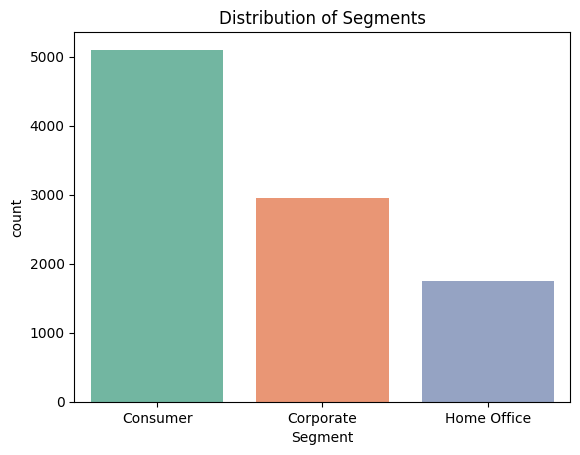

In [15]:
sns.countplot(data=df, x='Segment', palette='Set2')
plt.title("Distribution of Segments")
plt.show()

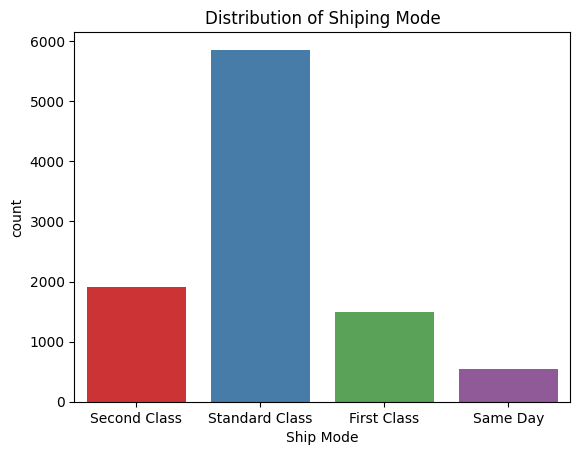

In [16]:
sns.countplot(data=df, x='Ship Mode', palette='Set1')
plt.title("Distribution of Shiping Mode")
plt.show()

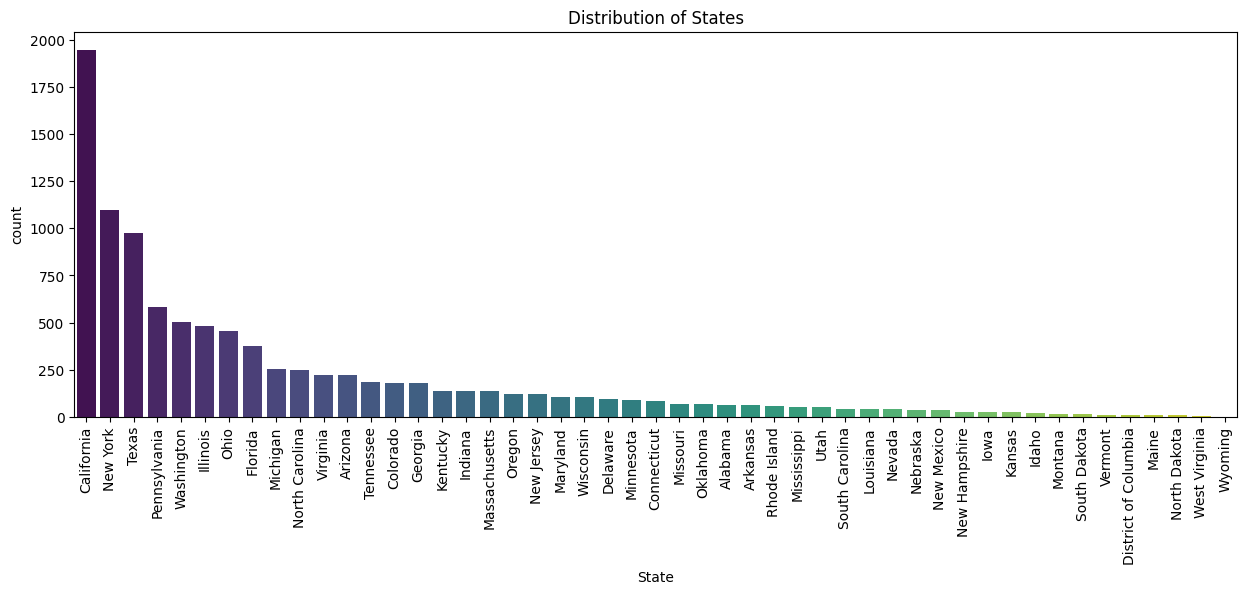

In [19]:
plt.figure(figsize = (15,5))
order= df['State'].value_counts().index
sns.countplot(data=df, x='State',order=order,palette='viridis')
plt.title("Distribution of States")
plt.xticks(rotation=90)
plt.show()

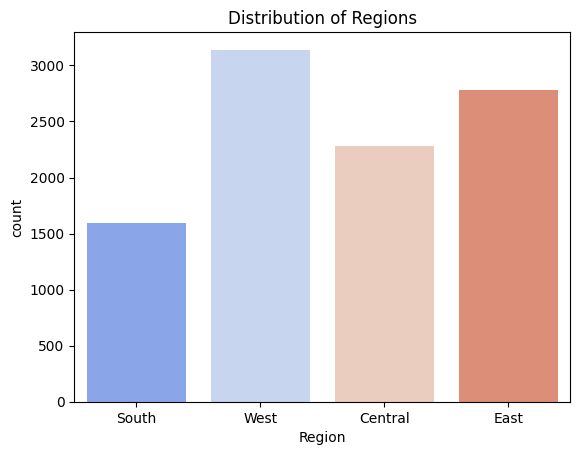

In [20]:
sns.countplot(data=df, x='Region', palette='coolwarm')
plt.title("Distribution of Regions");

In [21]:
df['Category'].nunique()

3

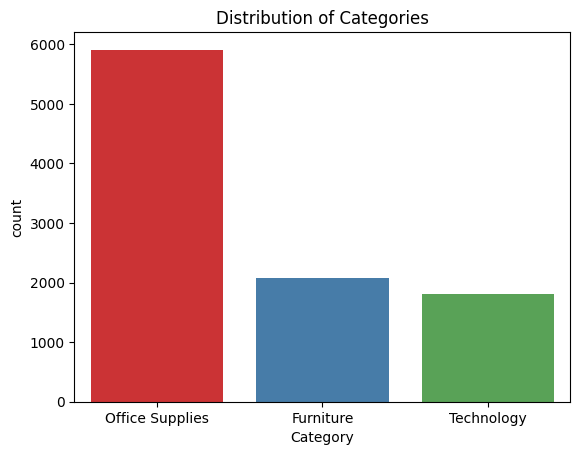

In [22]:
sns.countplot(data=df, x='Category', palette='Set1', order= df['Category'].value_counts().index)
plt.title("Distribution of Categories");

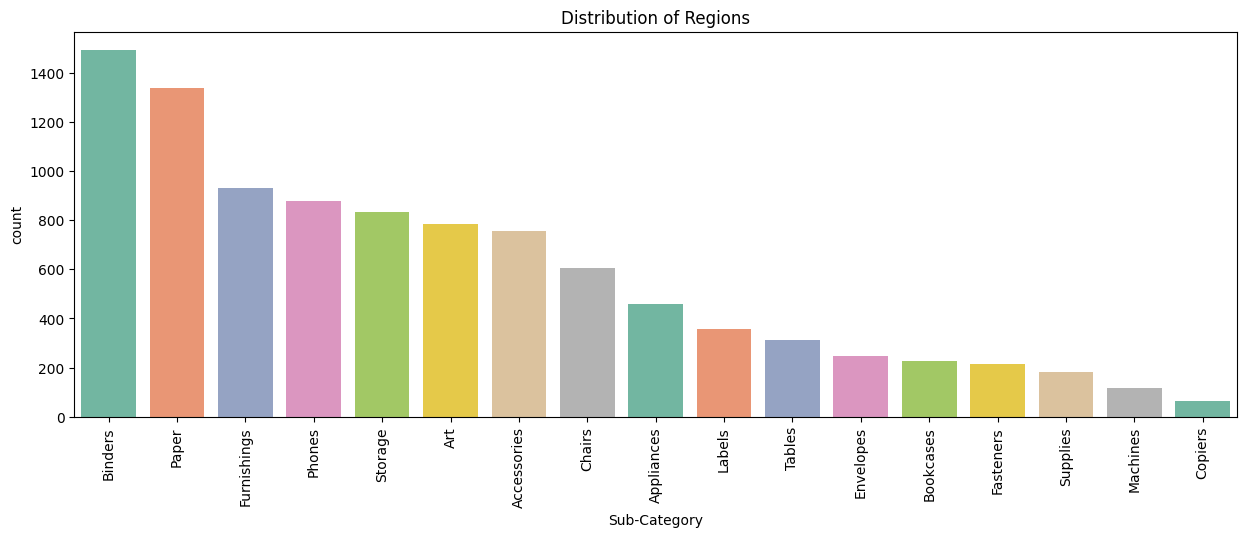

In [23]:
plt.figure(figsize = (15,5))
sns.countplot(data=df, x='Sub-Category', palette='Set2',order= df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Regions");

# 3. Bivariate Analysis(*two variables analysis*):

In [24]:
df['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9799, dtype: float64

In [25]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_states = Top_states[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe

### **States with the highest Revenue**

In [26]:
state_revenue = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)


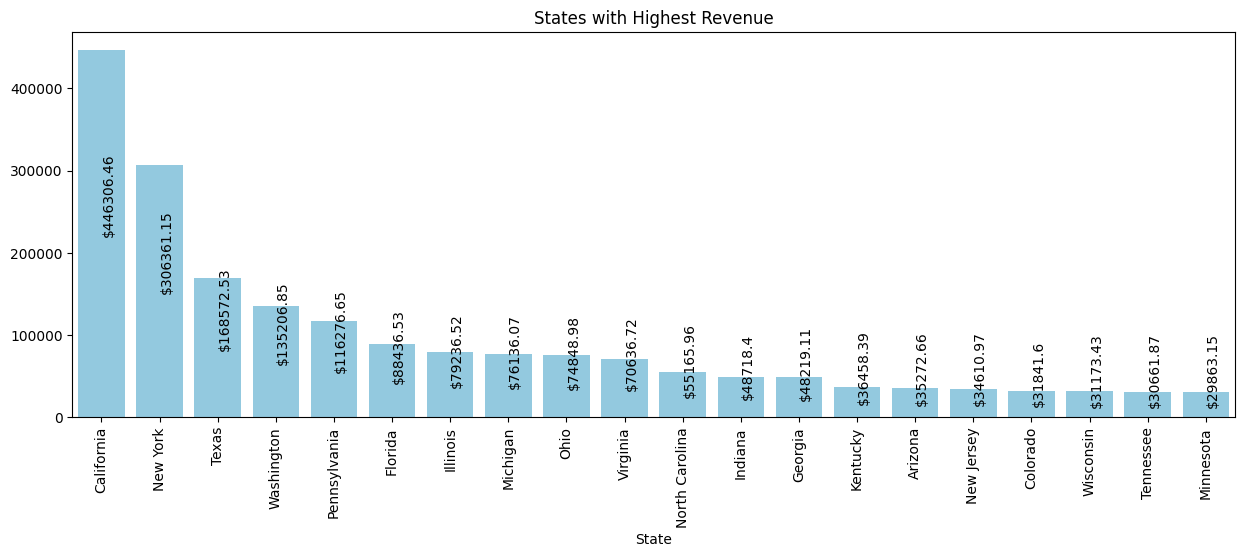

In [27]:
plt.figure(figsize=(15, 5))
bars = sns.barplot(x=state_revenue.index, y= state_revenue.values.round(2), color='skyblue', linewidth=1)
# Adding labels on bars
for bar, value in zip(bars.patches, state_revenue.values.round(2)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'${value}',
             rotation=90, fontsize=10, color='black')
plt.xticks(rotation=90)
plt.title("States with Highest Revenue");

### Cities with Highest Revenue

In [28]:
city_revenue = df.groupby('City')['Sales'].sum().sort_values(ascending = False).round(2).head(20)

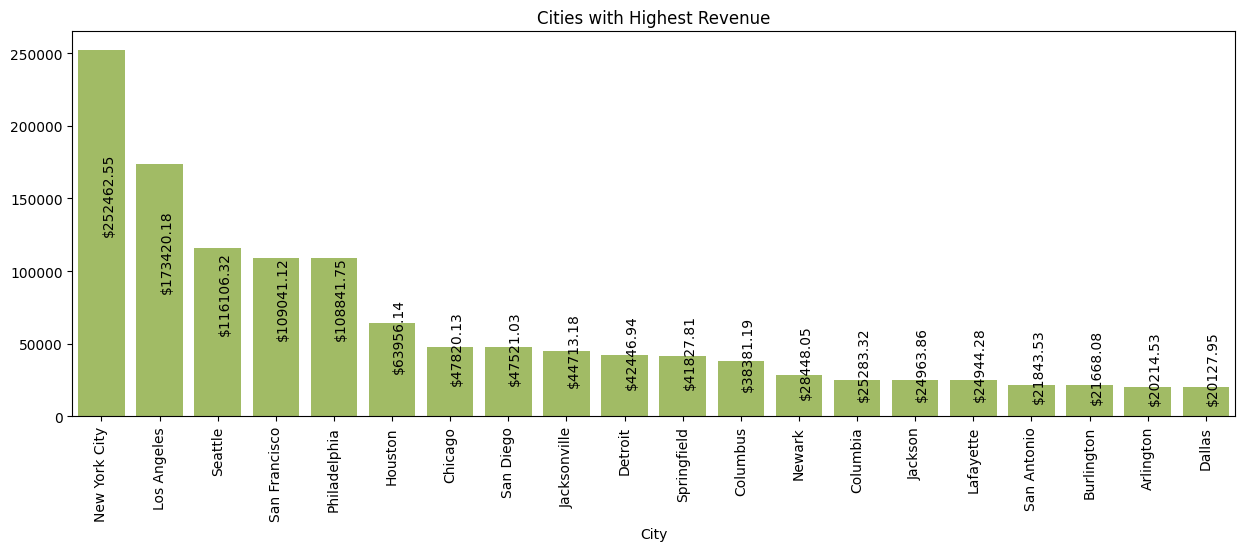

In [29]:
plt.figure(figsize=(15,5))

bars = sns.barplot(x= city_revenue.index, y= city_revenue.values, color='#a7c957')
for bar, value in zip(bars.patches, city_revenue.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'${value}',
             rotation=90, fontsize=10, color='black')
plt.xticks(rotation=90)
plt.title("Cities with Highest Revenue");

### Revenue by Categories

In [30]:
cate_rev = df.groupby('Category')['Sales'].sum().sort_values(ascending=True)

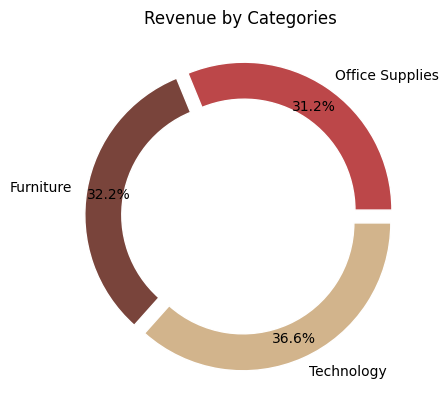

In [31]:
plt.pie(cate_rev, labels=cate_rev.index,autopct = '%1.1f%%',
        colors = ['#bc4749', '#79443B', '#D2B48C'],
        explode= (0.05, 0.05, 0.05), pctdistance=0.85,
        wedgeprops=dict(width=.25, edgecolor='w'),radius=1)
plt.title('Revenue by Categories');

## Revenue by Sub Categories

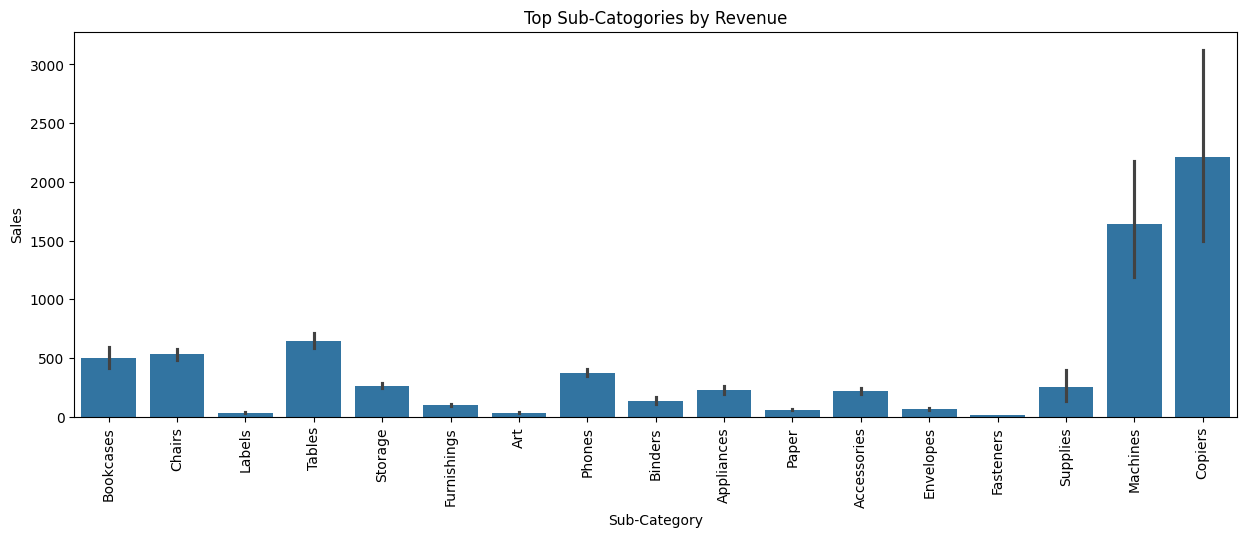

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Sub-Category'],y=df['Sales'])
plt.title('Top Sub-Catogories by Revenue')
plt.xticks(rotation=90);

## Highest Revenue by Regions

In [33]:
reg_rev = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)

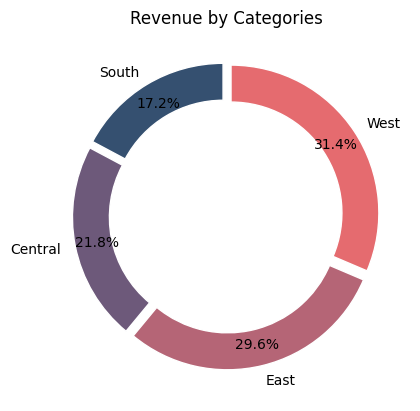

In [34]:
plt.pie(reg_rev, labels=reg_rev.index,autopct ='%1.1f%%',
        colors = ['#355070','#6d597a','#b56576','#e56b6f'],
        explode= (0.04, 0.04, 0.04,0.04), pctdistance=0.85,
        wedgeprops=dict(width=.25, edgecolor='w'),radius=1,startangle=90)
plt.title('Revenue by Categories');

## Top Products by Revenue

In [35]:
prod_rev = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).round(0).head(10)

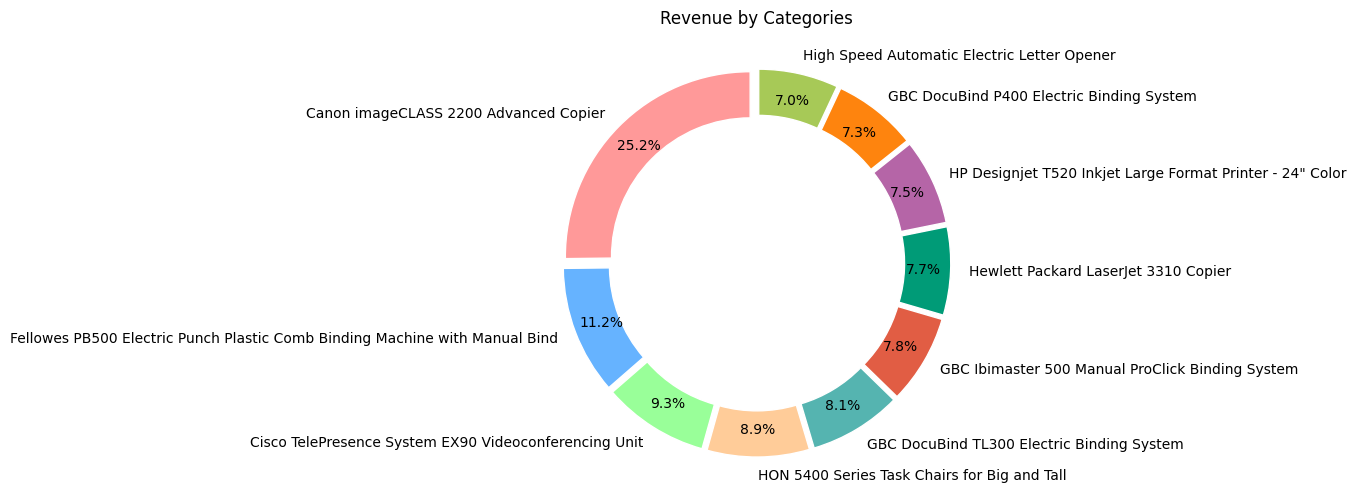

In [36]:
plt.figure(figsize=(8,6))
plt.pie(prod_rev, labels=prod_rev.index,autopct ='%1.1f%%',
        colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7','#FE840E','#a7c957'],
        explode= (0.05, 0.05, 0.05,0.05,0.05, 0.05, 0.05,0.05,0.05, 0.05), pctdistance=0.85,startangle=90,
        wedgeprops=dict(width=.25, edgecolor='w'),radius=1)
plt.title('Revenue by Categories');

## Revenue by Shipping Mode

In [37]:
ship_rev = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).round(0)

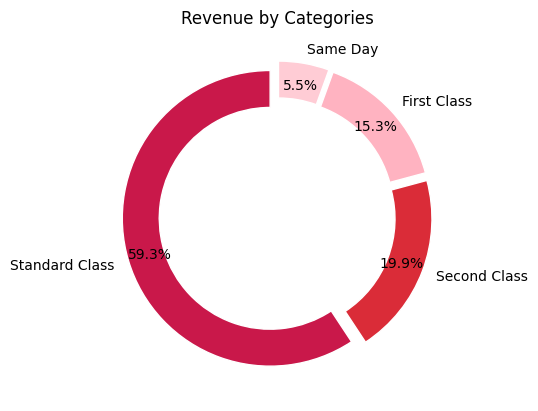

In [38]:
plt.pie(ship_rev, labels=ship_rev.index,autopct = '%1.1f%%',
        colors = ['#c9184a','#da2c38','#ffb3c1',"#ffccd5"],
        explode= (0.05, 0.05, 0.05,0.05), pctdistance=0.85,
        wedgeprops=dict(width=.25, edgecolor='w'),radius=1,startangle=90)
plt.title('Revenue by Categories');

## Revenue by Year

In [39]:
df['ship_year'] = pd.DatetimeIndex(df['Ship Date']).year
df['ship_year'].sample(9)

1442    2018
1974    2015
5559    2016
3664    2015
8776    2017
3605    2018
521     2016
5404    2017
2035    2018
Name: ship_year, dtype: int32

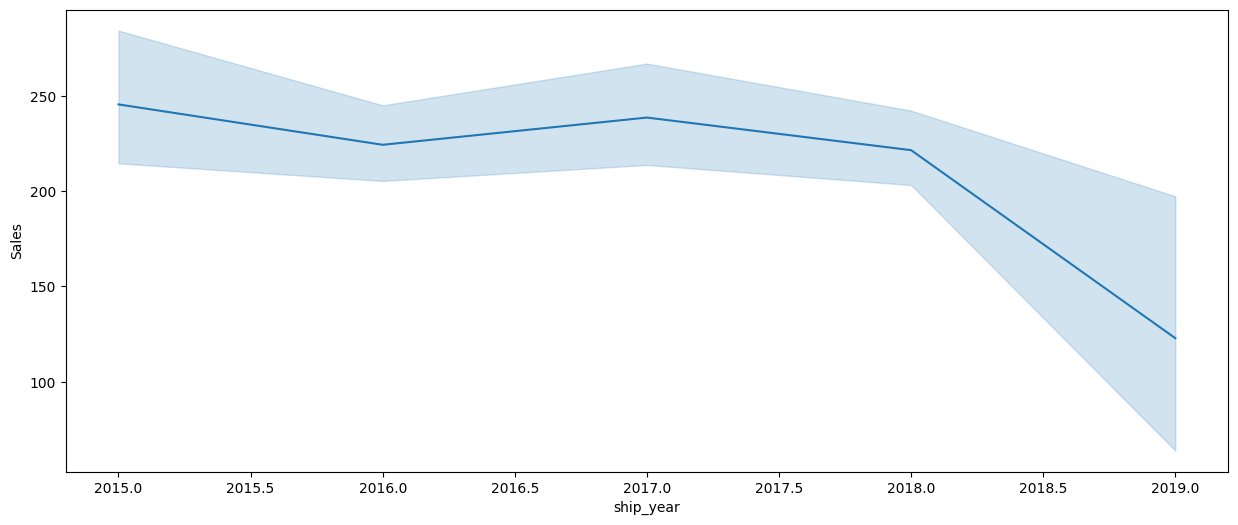

In [40]:
plt.figure(figsize=(15,6))
sns.lineplot(data = df, x = 'ship_year', y = 'Sales',markers='o');
plt.show()